# Term Project - Milestone #1

Simon Aytes

MAT 328 - Techniques in Data Science

Spring 2022

Professor Owen

----

## Import libraries

In [82]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

# 1. Combining the data
----

In [71]:
test = pd.read_csv("/Users/simon/Documents/GitHub/mat328-term-project/data/raw/test.csv")
train = pd.read_csv("/Users/simon/Documents/GitHub/mat328-term-project/data/raw/train.csv")

In [72]:
data = test.append(train)

In [73]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0,NaN
1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0,NaN
2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN,NaN
3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0,NaN
4,3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN,NaN


# 2. Cleaning the data
----

In [74]:
data.dtypes

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD         float64
dtype: object

In [75]:
# Drop all empty values
data = data.dropna(how="any")

In [76]:
data['sex'] = data['sex'].map({'M': '1', 'F': '0'}).astype(int)

In [77]:
data['is_smoking'] = data['is_smoking'].map({'YES': '1', 'NO': '0'}).astype(int)

In [78]:
data['BPMeds'] = data['BPMeds'].astype(int)

In [79]:
data['education'] = data['education'].astype(int)

In [83]:
data.head(1)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4,1,0,0.0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0


In [80]:
data.dtypes

id                   int64
age                  int64
education            int64
sex                  int64
is_smoking           int64
cigsPerDay         float64
BPMeds               int64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD         float64
dtype: object

In [81]:
data.shape

(2927, 17)

# Single Variable Plots
----

## Plot #1: BMI

The **BMI** column contains data related to the participant's Body Mass Index. BMI can be calculated using the following equation: $BMI = \frac{W}{H^2}$, where $W$ is weight in kilograms (kg) and $H$ is height in meters.


<AxesSubplot:title={'center':'BMI Distribution'}, xlabel='BMI', ylabel='Count'>

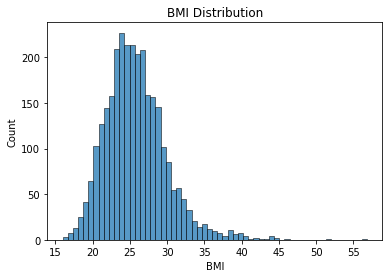

In [95]:
bmi_plot = sns.histplot(data['BMI'])
bmi_plot.set(title='BMI Distribution', xlabel="BMI", ylabel="Count")
bmi_plot

## Plot #2: Cigarettes per day

In [119]:
# Visualize results from those who smoke only
smoke_filter = data['is_smoking'] == 1
smoker_data = data[smoke_filter]

In [127]:
print(f"There are {smoker_data.shape[0]} smokers in this dataset. They smoked an average of {round(smoker_data['cigsPerDay'].mean(), 2)} per day, ranging from {smoker_data['cigsPerDay'].min()} to {smoker_data['cigsPerDay'].max()} per day.")

There are 1447 smokers in this dataset. They smoked an average of 18.43 per day, ranging from 1.0 to 70.0 per day.


<AxesSubplot:title={'center':'Cigarettes Per Day Distribution'}, xlabel='Cigarettes per day'>

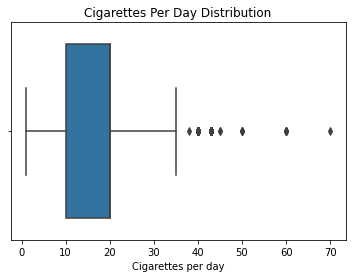

In [129]:
hr_plot = sns.boxplot(x=smoker_data['cigsPerDay'])
hr_plot.set(title='Cigarettes Per Day Distribution', xlabel="Cigarettes per day", ylabel="")
hr_plot

## Plot #3: Sex

<AxesSubplot:title={'center':'Sex Distribution'}, xlabel='Sex', ylabel='Count'>

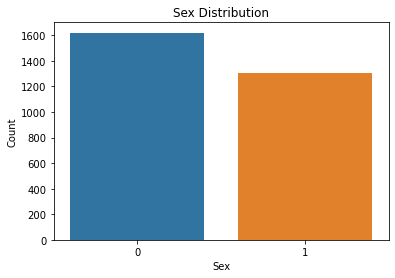

In [109]:
sex_plot = sns.countplot(x=data['sex'])
sex_plot.set(title='Sex Distribution', xlabel="Sex", ylabel="Count")
sex_plot

In [131]:
male_filter = data['sex'] == 1
males = data[male_filter]

female_filter = data['sex'] == 0
females = data[female_filter]

print(f"Females: {females.shape[0]}\nMales: {males.shape[0]}")

Females: 1620
Males: 1307


## Plot #4: Age

<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Age (years)', ylabel='Count'>

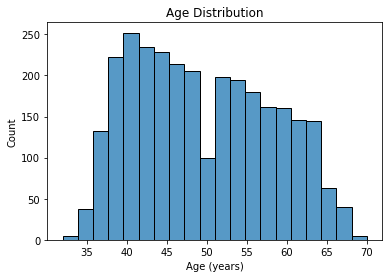

In [98]:
age_plot = sns.histplot(data['age'])
age_plot.set(title='Age Distribution', xlabel="Age (years)", ylabel="Count")
age_plot

# Multivariate plots
----

## Plot #1: Blood Pressure and Smoking

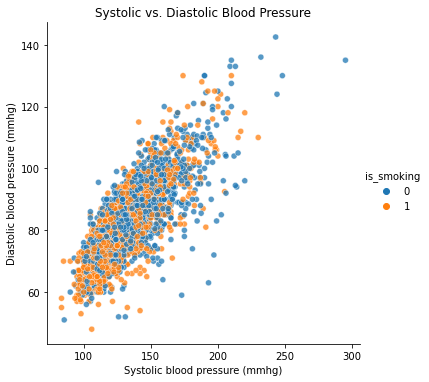

In [168]:
smoking_by_gender = sns.relplot(x="sysBP", y="diaBP", hue="is_smoking", alpha=0.75, data=data)
smoking_by_gender.set(title='Systolic vs. Diastolic Blood Pressure', xlabel="Systolic blood pressure (mmhg)", ylabel="Diastolic blood pressure (mmhg)")
smoking_by_gender.savefig('sysBP_vs_diaBP.png', dpi=300)

# Plot #2: Cholesterol and Glucose

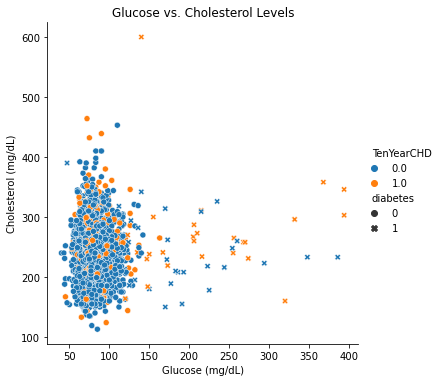

In [181]:
smoking_by_gender = sns.relplot(x="glucose", y="totChol", hue="TenYearCHD", style = "diabetes", alpha=1, data=data)
smoking_by_gender.set(title='Glucose vs. Cholesterol Levels', xlabel="Glucose (mg/dL)", ylabel="Cholesterol (mg/dL)")
smoking_by_gender.savefig('chol_gluc.png', dpi=300)